# Window : 1d

In [1]:
#import Bitcoins data
import pandas as pd
data_btc = pd.read_csv("/Users/GuillaumeKunsch/Desktop/TFM_Guillaume_Kunsch/Binance/BTCUSDT-1d-data.csv")

#we consider variation on the same day 
variation = []
for i in range (len(data_btc)) : 
    if data_btc["open"][i] >= data_btc["close"][i] : 
        variation = variation + [0] #decrease
    elif data_btc["open"][i] < data_btc["close"][i] : 
        variation = variation + [1] #increase
        
data_btc["variation"] = variation
data_btc = data_btc.rename(columns = {'timestamp':'date_format'}) #Rename column for future mergers
data_btc['date_format']= pd.to_datetime(data_btc['date_format']) #Need to put back data_btc on date format 
data_btc

,Unnamed: 0,Unnamed: 0.1,date_format,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,variation
0,0,0.0,2020-06-13,9464.96,9494.73,9351.00,9473.34,27759.784851,1592092799999,2.616732e+08,392763,13531.007214,1.275772e+08,0,1
1,1,1.0,2020-06-14,9473.34,9480.99,9245.00,9342.10,30055.506608,1592179199999,2.821313e+08,415568,14465.416151,1.358116e+08,0,0
2,2,2.0,2020-06-15,9342.10,9495.00,8910.45,9426.02,86107.924707,1592265599999,7.935188e+08,839521,41630.747529,3.840311e+08,0,1
3,3,3.0,2020-06-16,9426.05,9589.00,9373.09,9525.59,52052.446927,1592351999999,4.944583e+08,543481,25692.839625,2.440974e+08,0,1
4,4,4.0,2020-06-17,9526.97,9565.00,9236.61,9465.14,48046.411152,1592438399999,4.532098e+08,536158,22842.831276,2.155327e+08,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,38,NaN,2021-01-10,40088.22,41350.00,35111.11,38150.02,118209.544503,1610323199999,4.604035e+09,2628050,55451.344673,2.160977e+09,0,0
213,39,NaN,2021-01-11,38150.02,38264.74,30420.00,35404.47,249131.539943,1610409599999,8.426880e+09,4431451,122133.406190,4.133116e+09,0,0
214,40,NaN,2021-01-12,35410.37,36628.00,32531.00,34051.24,133948.151996,1610495999999,4.651302e+09,2674145,65098.310196,2.261732e+09,0,0
215,41,NaN,2021-01-13,34049.15,37850.00,32380.00,37371.38,124477.914938,1610582399999,4.322877e+09,2514289,63981.038306,2.222873e+09,0,1


In [2]:
data_btc["variation"].value_counts() #trend towards increase but both quite well represented : balanced dataset

1    128
0     89
Name: variation, dtype: int64

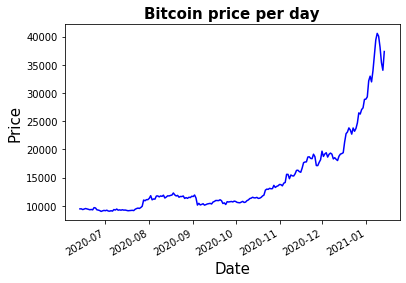

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = data_btc["date_format"]
y= data_btc["open"]
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Price' , fontsize=15)
ax.set_title('Bitcoin price per day', fontsize=15, fontweight='bold')
plt.plot(x,y, color = "blue")
fig.autofmt_xdate()

# Window : 1h

In [4]:
#import Bitcoins data
import pandas as pd
data_btc = pd.read_csv("/Users/GuillaumeKunsch/Desktop/TFM_Guillaume_Kunsch/Binance/BTCUSDT-1h-data.csv")

#We consider variation each hour
variation = []
for i in range (len(data_btc)) : 
    if data_btc["open"][i] >= data_btc["close"][i] : 
        variation = variation + [0] #decrease
    elif data_btc["open"][i] < data_btc["close"][i] : 
        variation = variation + [1] #increase
        
data_btc["variation"] = variation
data_btc = data_btc.rename(columns = {'timestamp':'date_format'}) #rename column for future mergers
data_btc['date_format']= pd.to_datetime(data_btc['date_format']) #need to put back data_btc on date format 
data_btc

,Unnamed: 0,date_format,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,variation
0,0,2020-06-13 00:00:00,9464.96,9477.18,9431.05,9446.76,1347.107225,1592009999999,1.272985e+07,21789,560.837354,5.299574e+06,0,0
1,1,2020-06-13 01:00:00,9446.67,9449.89,9423.00,9442.45,741.003726,1592013599999,6.992785e+06,14154,351.087252,3.313188e+06,0,0
2,2,2020-06-13 02:00:00,9442.34,9442.34,9409.87,9426.57,715.462614,1592017199999,6.744837e+06,12943,336.825691,3.175585e+06,0,0
3,3,2020-06-13 03:00:00,9426.58,9431.90,9398.49,9408.54,1033.337333,1592020799999,9.732715e+06,13923,561.418947,5.288192e+06,0,0
4,4,2020-06-13 04:00:00,9408.54,9410.00,9362.08,9407.60,1768.051802,1592024399999,1.660003e+07,21481,820.629390,7.705820e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,5158,2021-01-14 06:00:00,37529.11,38100.00,37440.00,37837.21,3705.587755,1610607599999,1.401213e+08,73541,1841.116843,6.965356e+07,0,1
5159,5159,2021-01-14 07:00:00,37837.20,38596.92,37703.09,38198.34,5294.802195,1610611199999,2.028865e+08,107847,2818.319058,1.080024e+08,0,1
5160,5160,2021-01-14 08:00:00,38199.52,38786.10,38192.64,38370.01,3936.809626,1610614799999,1.516776e+08,96897,2022.192144,7.792238e+07,0,1
5161,5161,2021-01-14 09:00:00,38370.01,38464.13,37862.04,37938.11,3551.706141,1610618399999,1.356779e+08,97054,1679.065733,6.415879e+07,0,0


In [5]:
data_btc["variation"].value_counts() #trend towards increase but both quite well represented : balanced dataset

1    2704
0    2459
Name: variation, dtype: int64

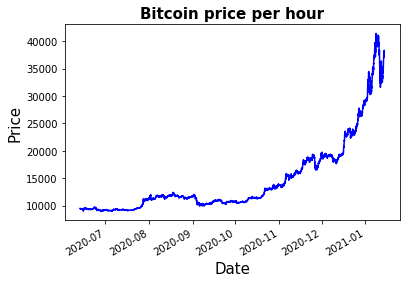

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = data_btc["date_format"]
y= data_btc["open"]
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Price' , fontsize=15)
ax.set_title('Bitcoin price per hour', fontsize=15, fontweight='bold')
plt.plot(x,y, color = "blue")
fig.autofmt_xdate()

# Window : 5min

In [7]:
#import Bitcoins data
import pandas as pd
data_btc = pd.read_csv("/Users/GuillaumeKunsch/Desktop/TFM_Guillaume_Kunsch/Binance/BTCUSDT-5m-data.csv")


#we consider variation each 5min
variation = []
for i in range (len(data_btc)) : 
    if data_btc["open"][i] >= data_btc["close"][i] : 
        variation = variation + [0] #decrease
    elif data_btc["open"][i] < data_btc["close"][i] : 
        variation = variation + [1] #increase
        
data_btc["variation"] = variation
data_btc = data_btc.rename(columns = {'timestamp':'date_format'}) #Rename column for future mergers
data_btc['date_format']= pd.to_datetime(data_btc['date_format']) #Need to put back data_btc on date format 
data_btc

,Unnamed: 0,date_format,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,variation
0,0,2020-06-13 00:00:00,9464.96,9477.18,9464.56,9469.90,116.927489,1592006699999,1.107655e+06,1613,45.191752,4.280866e+05,0,1
1,1,2020-06-13 00:05:00,9469.90,9472.71,9457.50,9457.71,114.728201,1592006999999,1.085632e+06,1911,55.967551,5.296268e+05,0,0
2,2,2020-06-13 00:10:00,9458.53,9463.26,9455.52,9457.64,64.675601,1592007299999,6.117606e+05,1404,31.226336,2.953806e+05,0,0
3,3,2020-06-13 00:15:00,9457.63,9458.82,9448.57,9449.20,119.074417,1592007599999,1.125644e+06,2163,42.380484,4.006556e+05,0,0
4,4,2020-06-13 00:20:00,9449.20,9460.01,9448.60,9460.00,89.434603,1592007899999,8.454443e+05,1712,39.019900,3.688812e+05,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121423,121423,2021-08-09 09:50:00,44875.54,45011.63,44830.18,44860.37,672.973175,1628502899999,3.023965e+07,21065,346.580760,1.557787e+07,0,0
121424,121424,2021-08-09 09:55:00,44860.37,44916.00,44815.73,44855.11,252.987088,1628503199999,1.135119e+07,9441,90.262774,4.050151e+06,0,0
121425,121425,2021-08-09 10:00:00,44855.11,45250.00,44855.10,45206.74,904.503360,1628503499999,4.077178e+07,18422,539.573401,2.433230e+07,0,1
121426,121426,2021-08-09 10:05:00,45206.73,45220.04,45061.83,45099.97,428.394873,1628503799999,1.933414e+07,13061,184.391890,8.322406e+06,0,0


In [8]:
data_btc["variation"].value_counts() #trend towards increase but both quite well represented : balanced dataset

1    60842
0    60586
Name: variation, dtype: int64

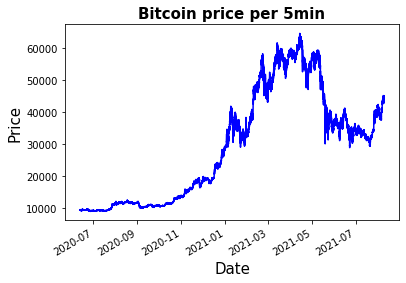

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = data_btc["date_format"]
y= data_btc["open"]
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Price' , fontsize=15)
ax.set_title('Bitcoin price per 5min', fontsize=15, fontweight='bold')
plt.plot(x,y, color = "blue")
fig.autofmt_xdate()